In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None
exp_path = Path.cwd().resolve() # experiment path
# visible GPUs
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [27]:
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import shutil

# HOLOGIC

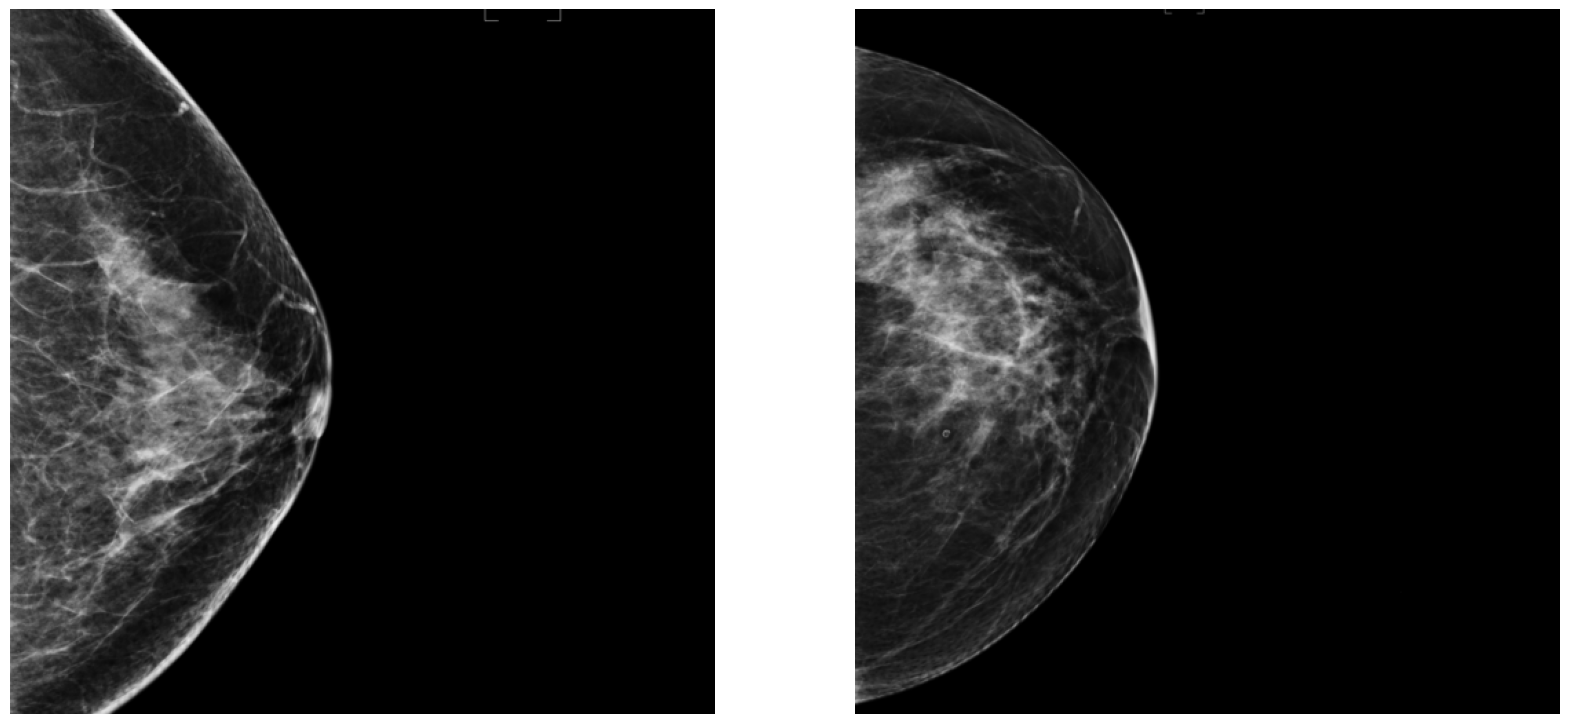

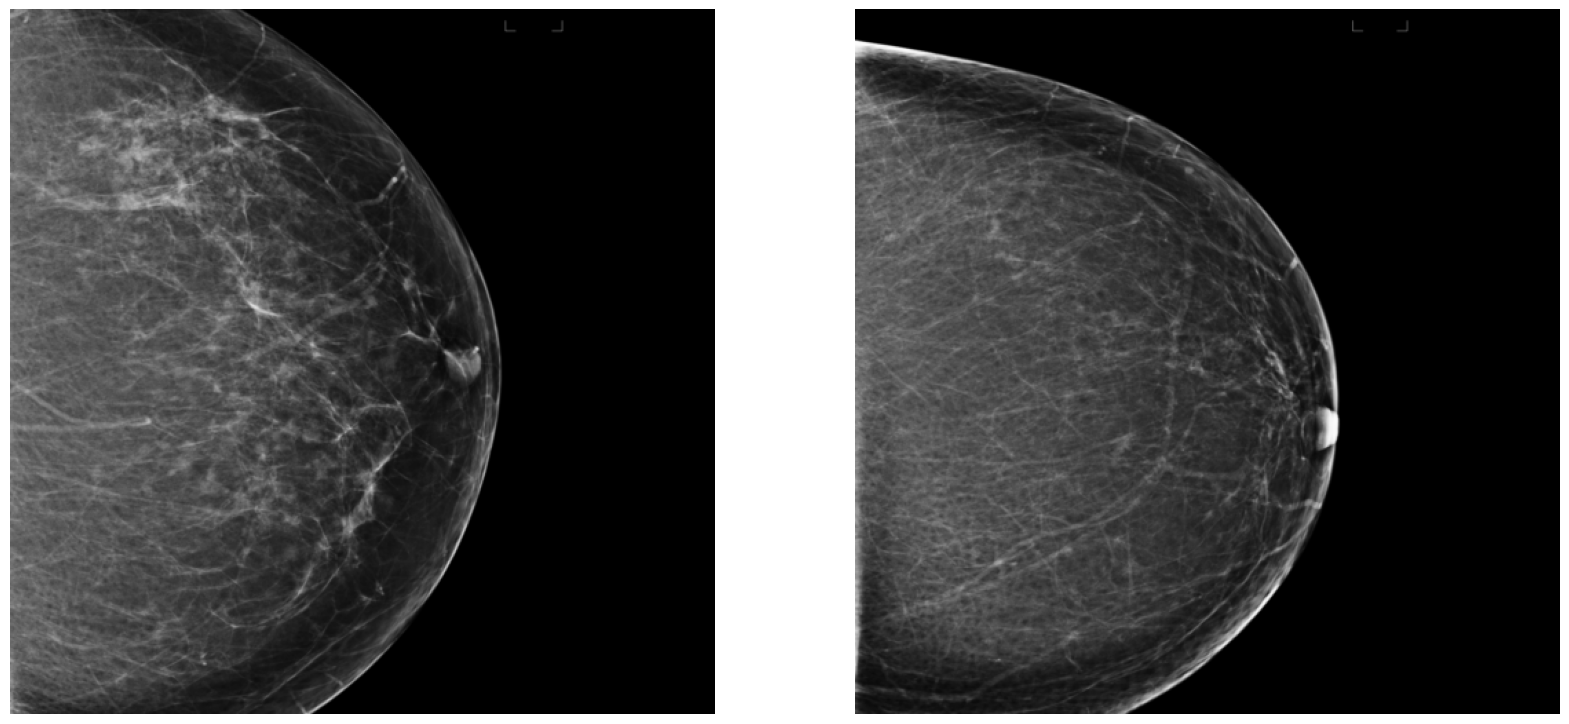

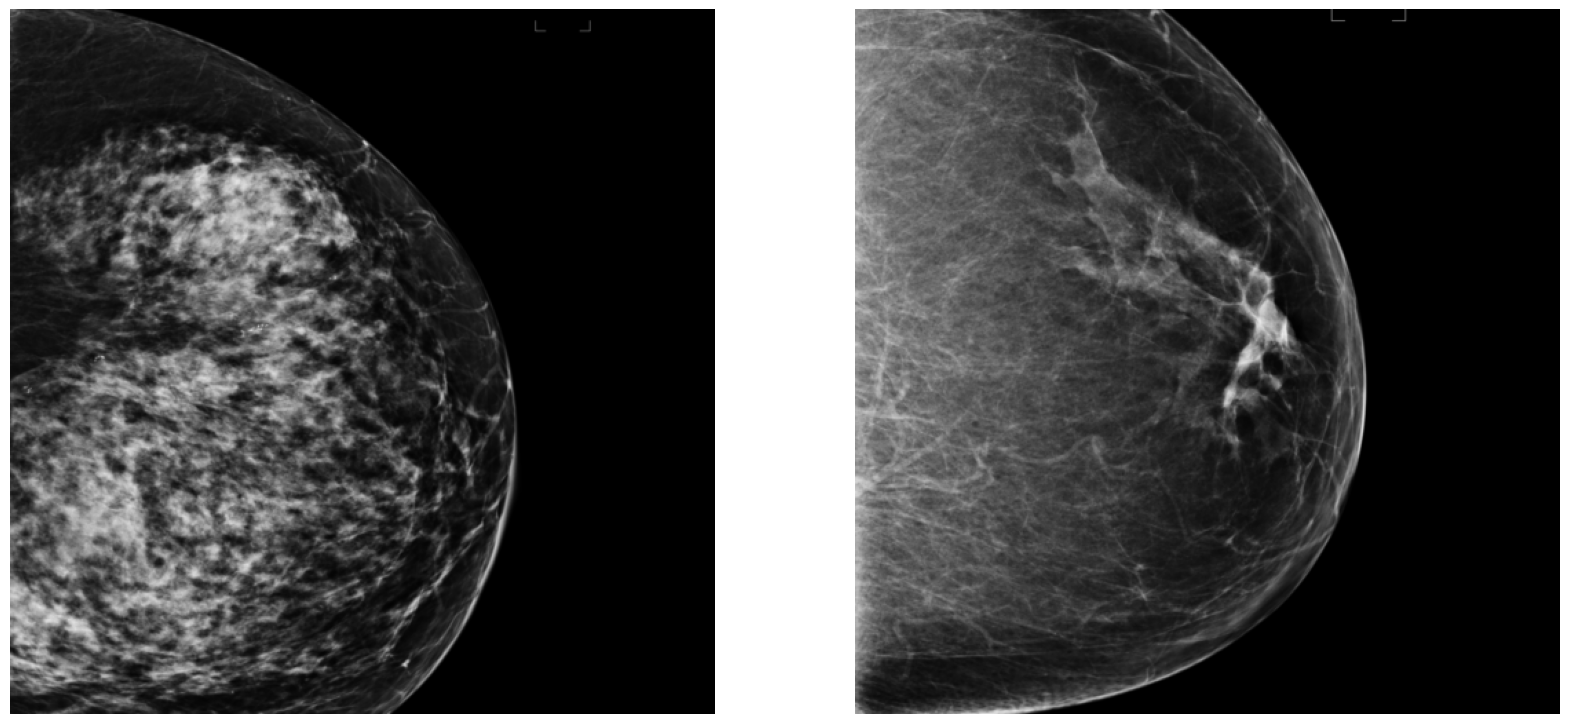

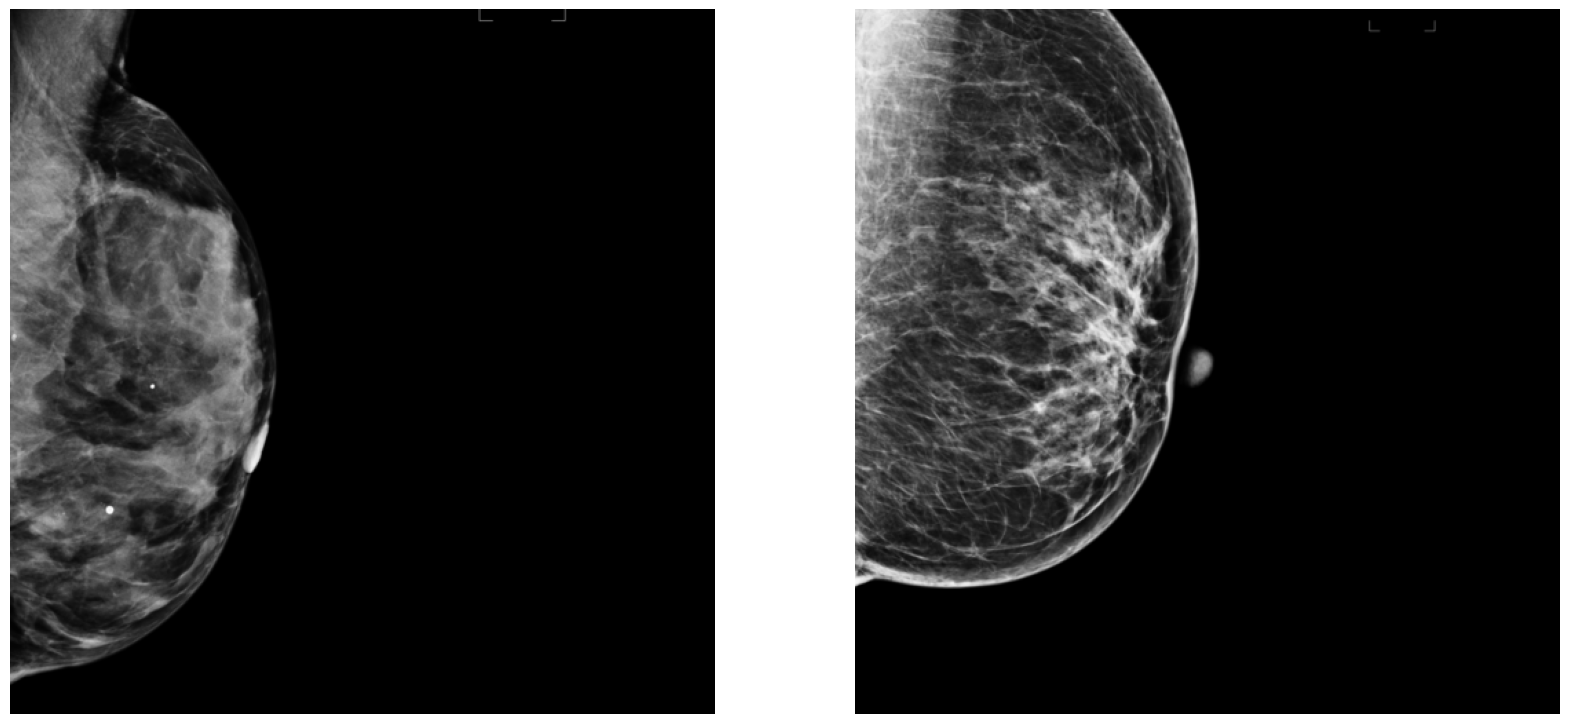

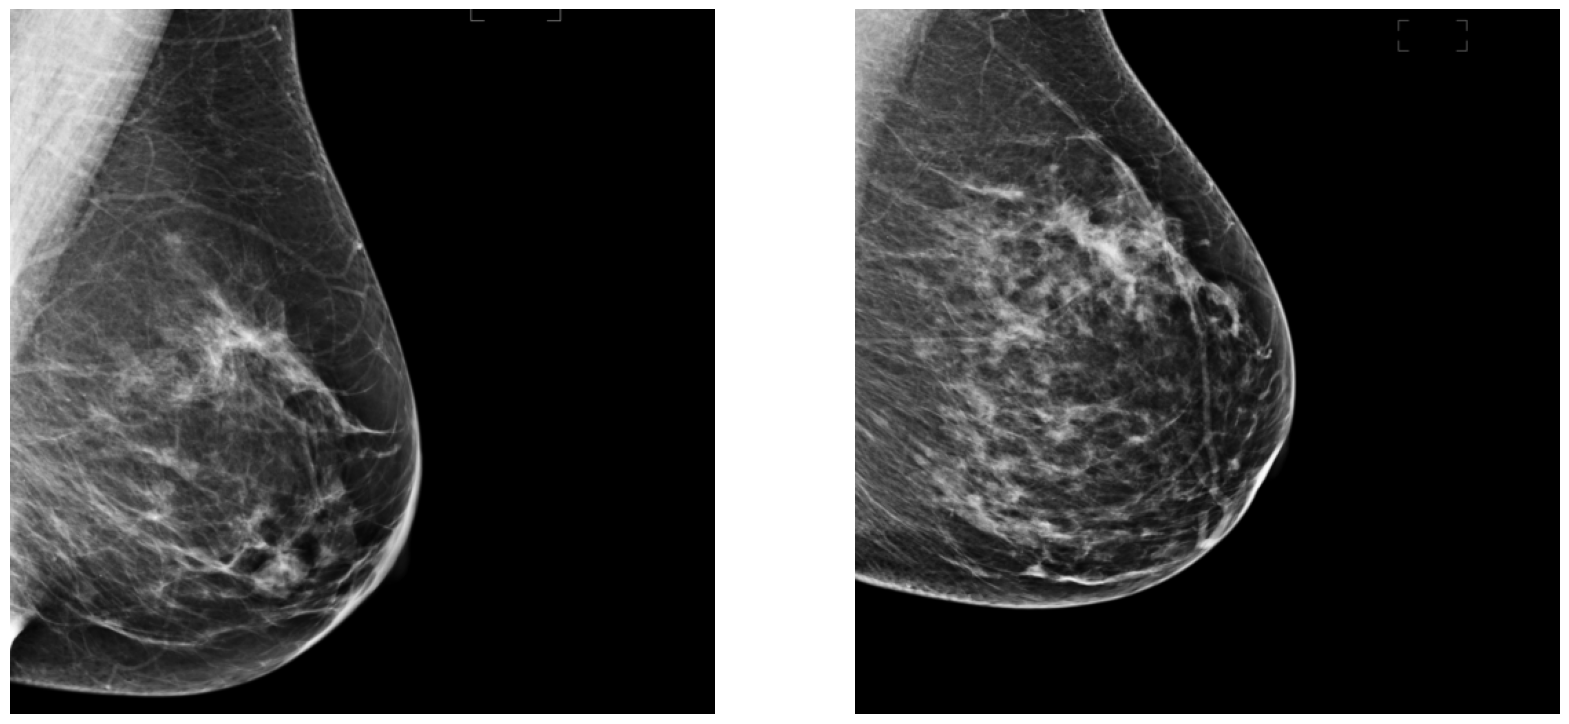

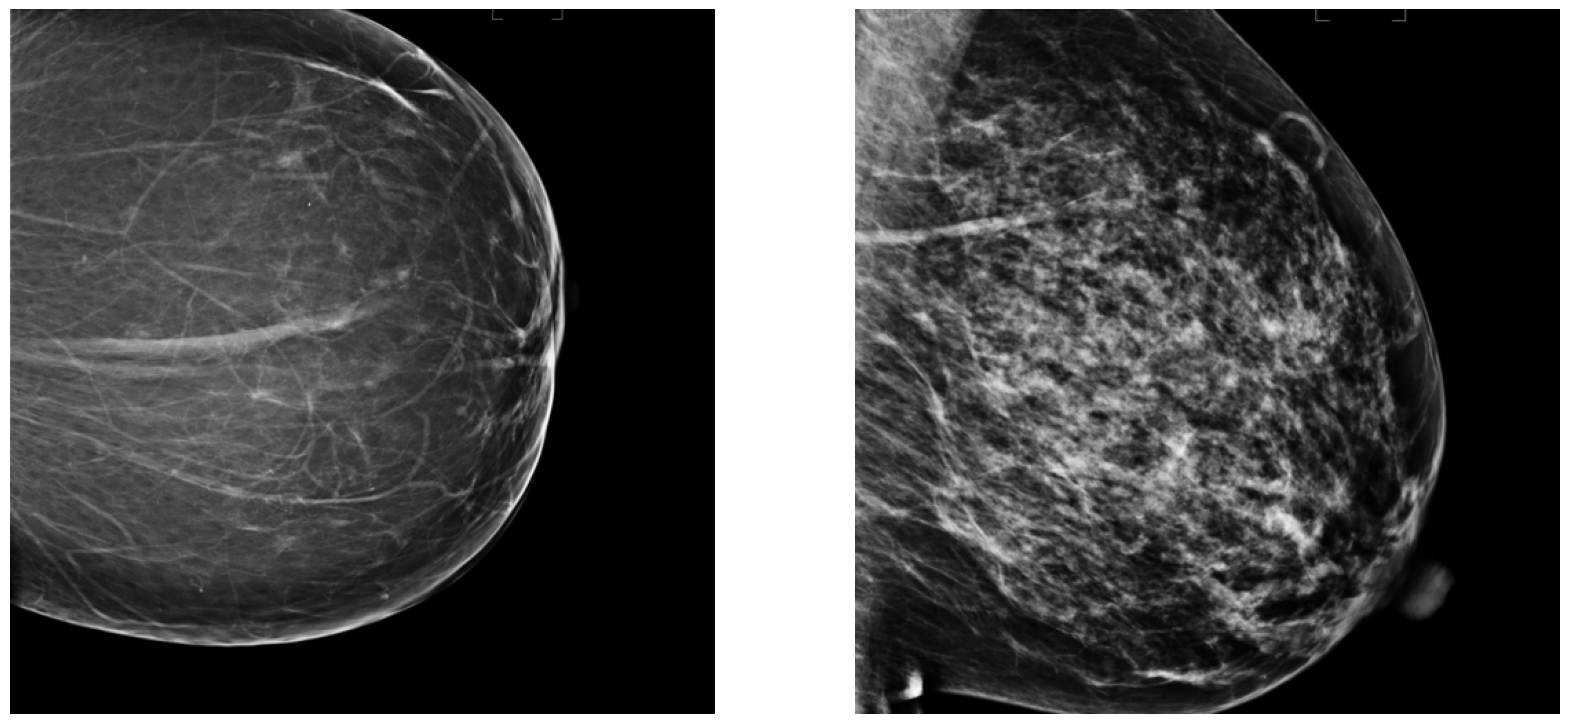

In [35]:
# HP
number_samples = 2

for view in ['CC', 'MLO']:
    for size in ['small', 'medium', 'big']:
        # read metadata file as json file
        metadata_path = repo_path / 'data/images/breast40k_RGB_healthy'
        metadata_file = metadata_path / 'metadata.jsonl'
        metadata = pd.read_json(metadata_file, lines=True)
        # filter metadata if both view and size are in the prompt column
        metadata = metadata[metadata['prompt'].str.contains(view) & metadata['prompt'].str.contains(size)]
        # get random samples
        samples = metadata.sample(number_samples)
        # get the image paths
        image_paths = samples['file_name'].tolist()
        # show images
        fig, axs = plt.subplots(1, number_samples, figsize=(20, 20))
        for i, image_path in enumerate(image_paths):
            image = Image.open(metadata_path / image_path)
            axs[i].imshow(image)
            axs[i].axis('off')
        # make a copy of the images using shutil
        for i, image_path in enumerate(image_paths):
            saving_path = repo_path / 'assessment/qualitative/data/hologic_real' / f'H_{view}_{size}_{i}.png'
            shutil.copy(metadata_path / image_path, saving_path)
            


# Siemens

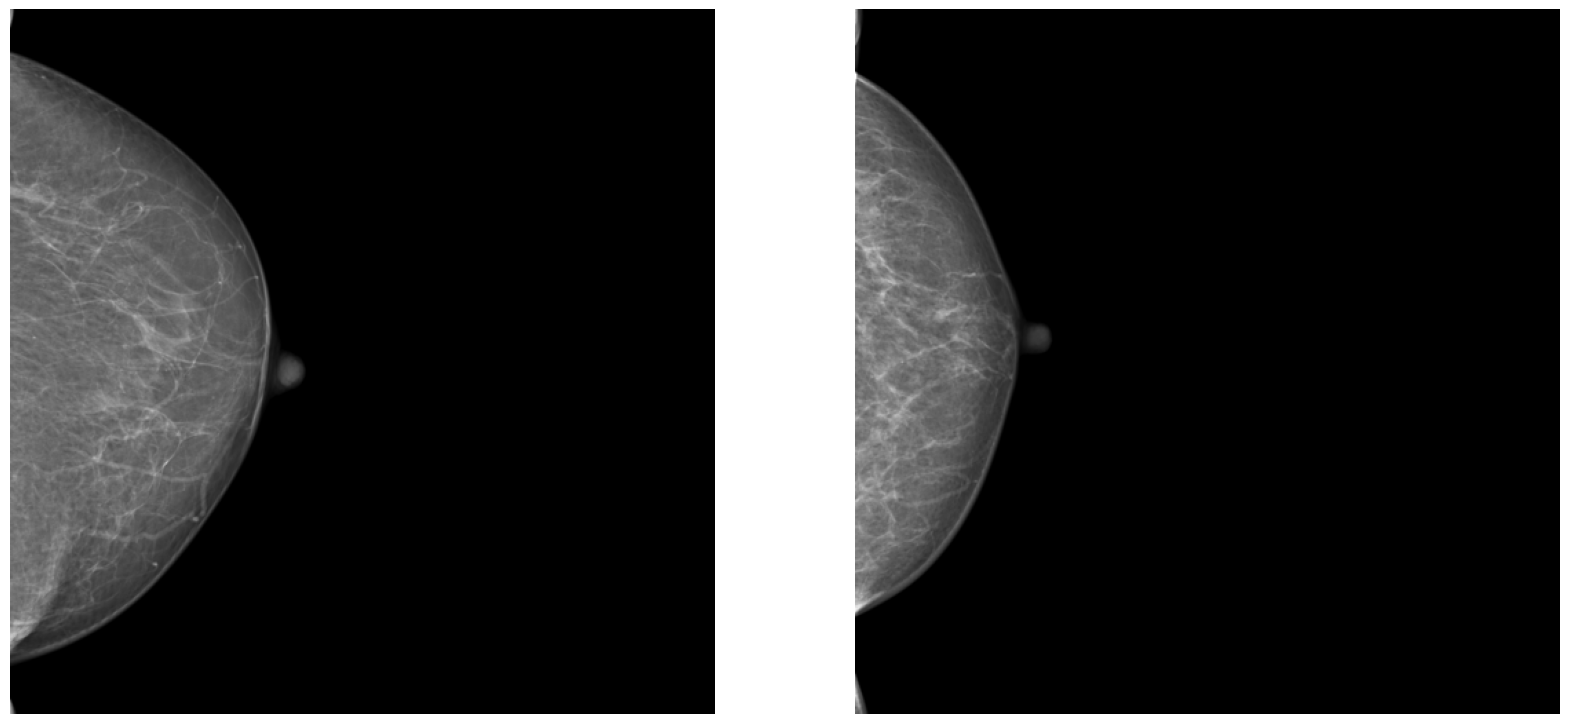

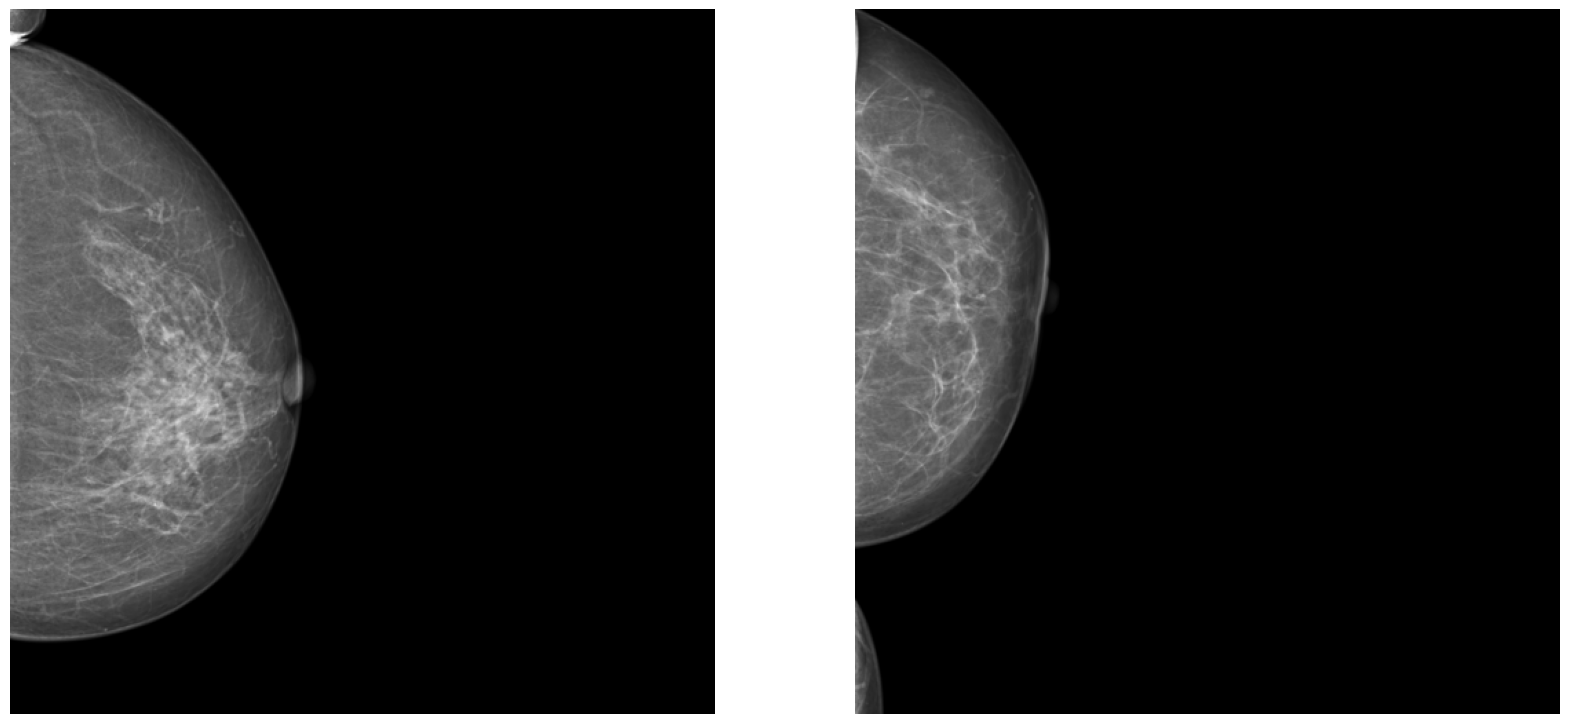

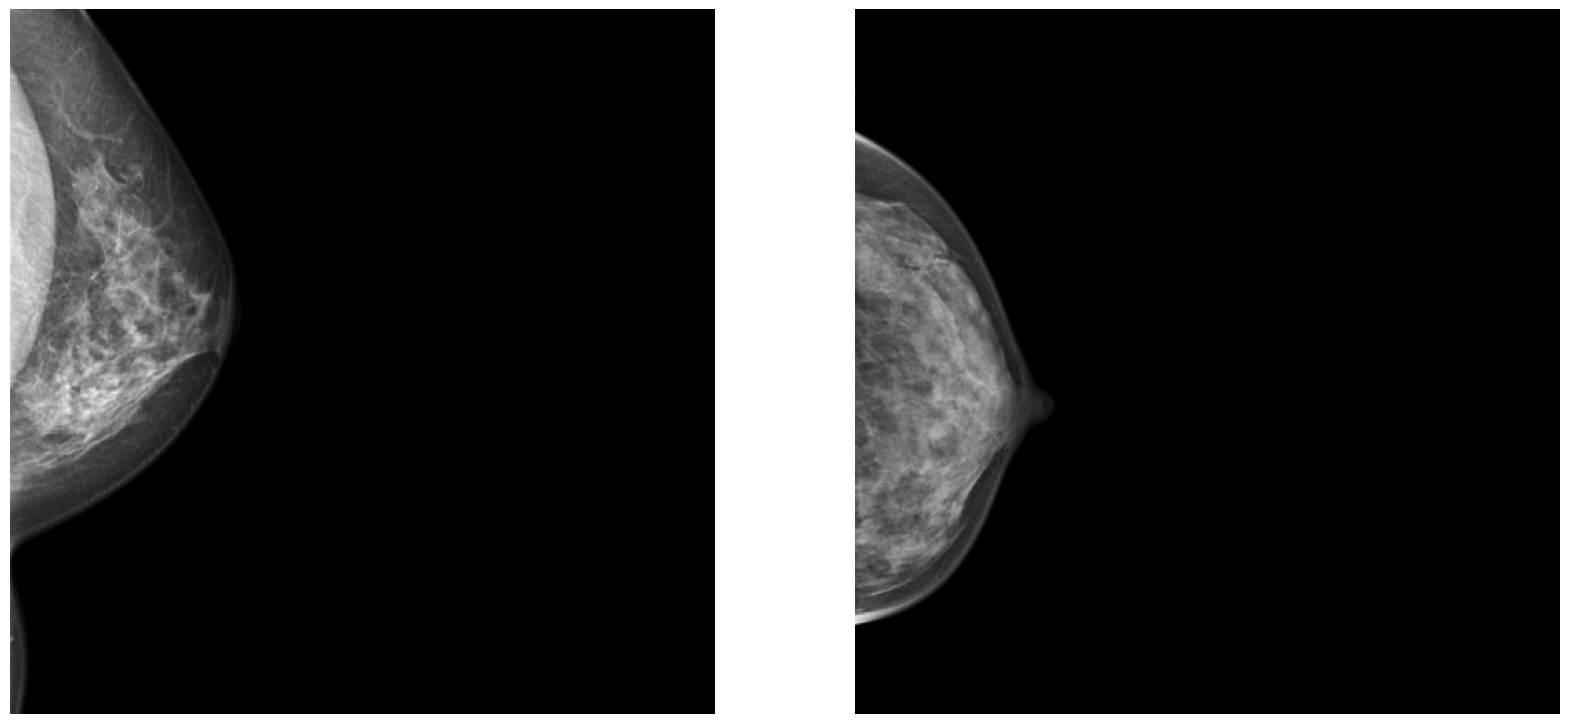

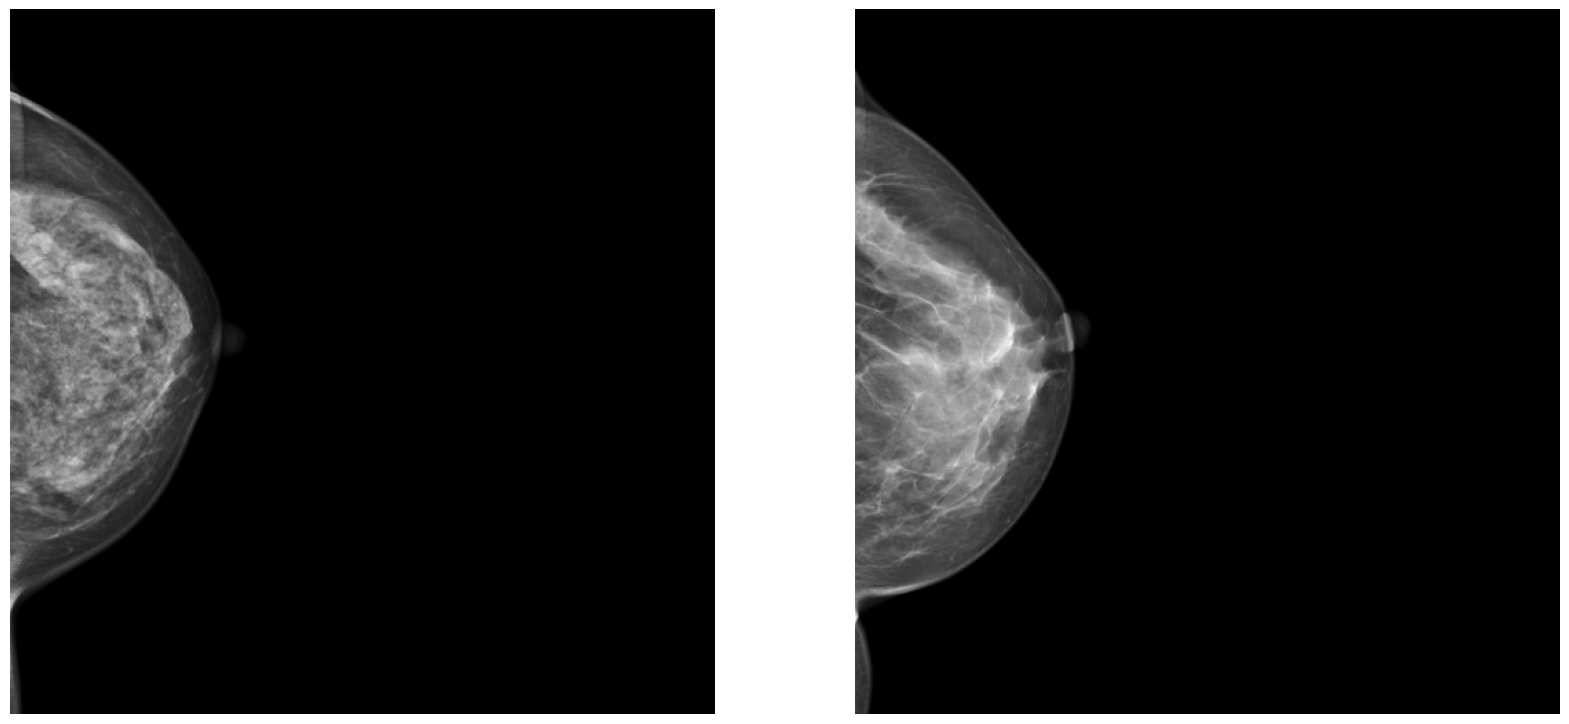

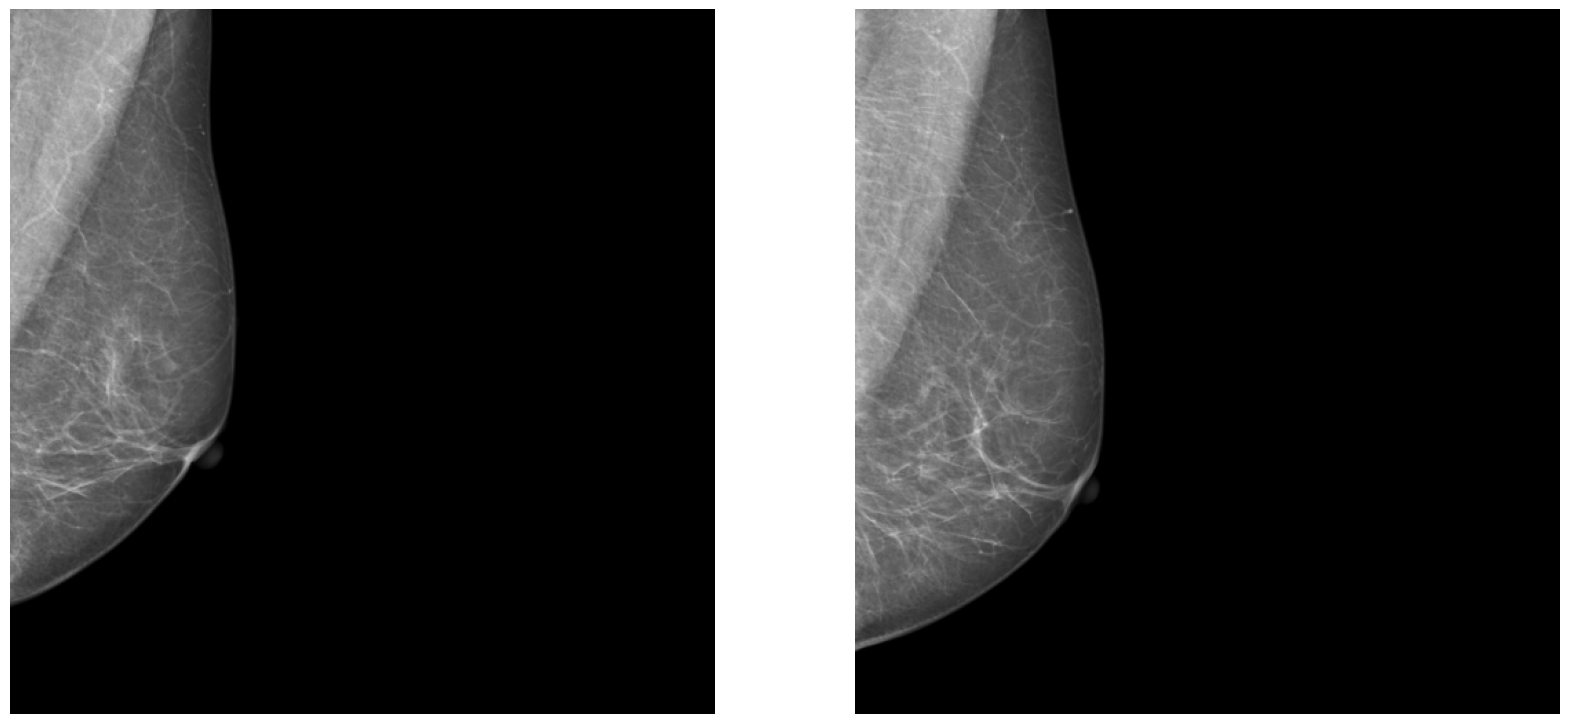

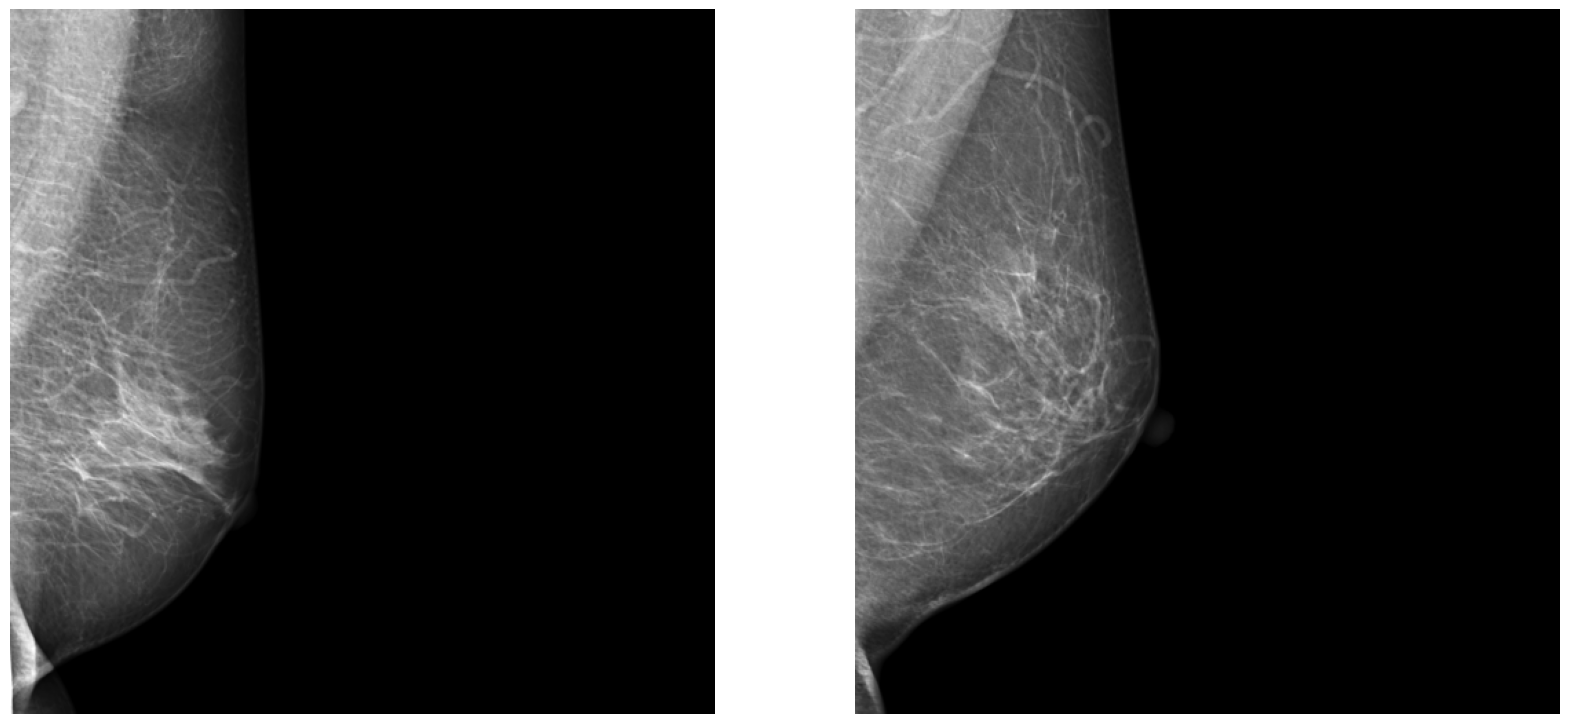

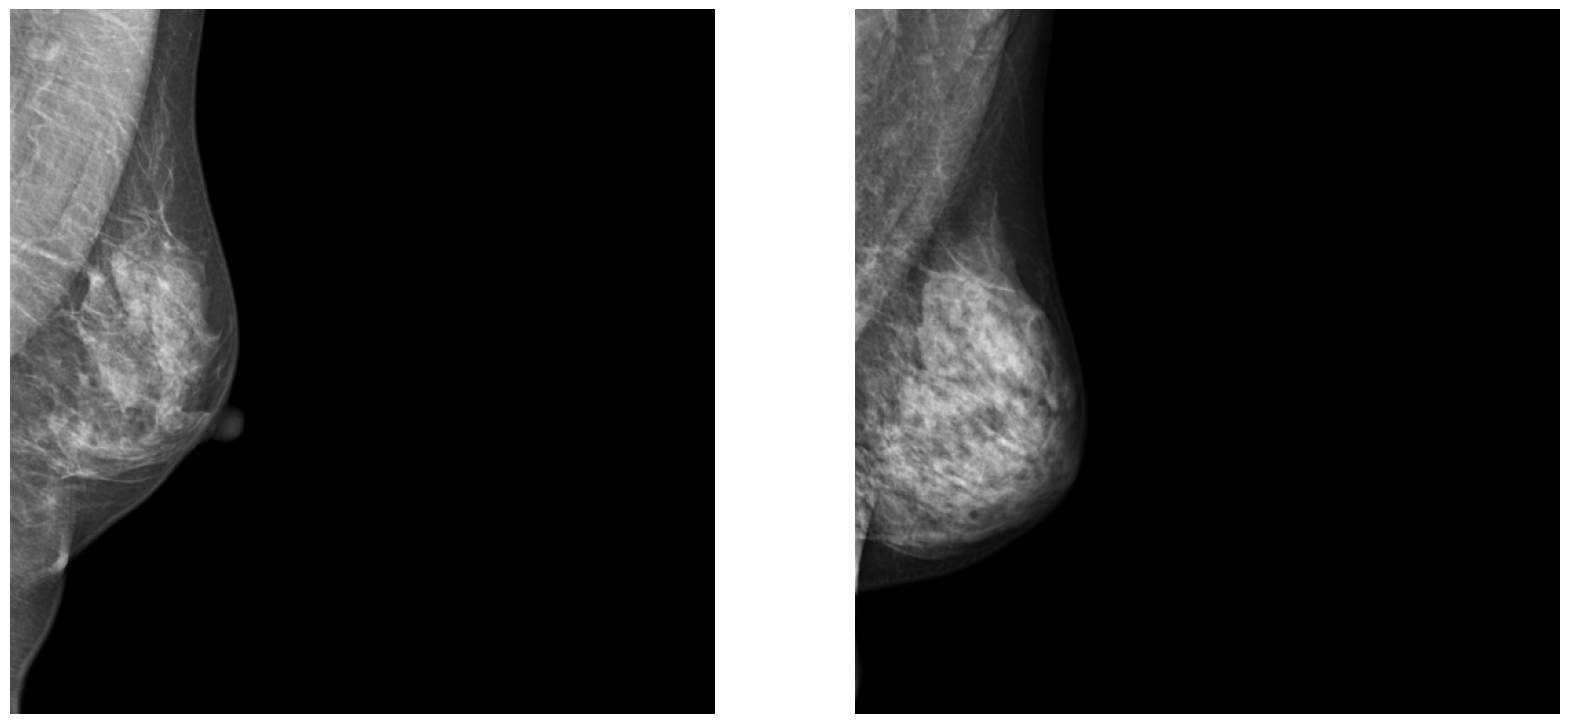

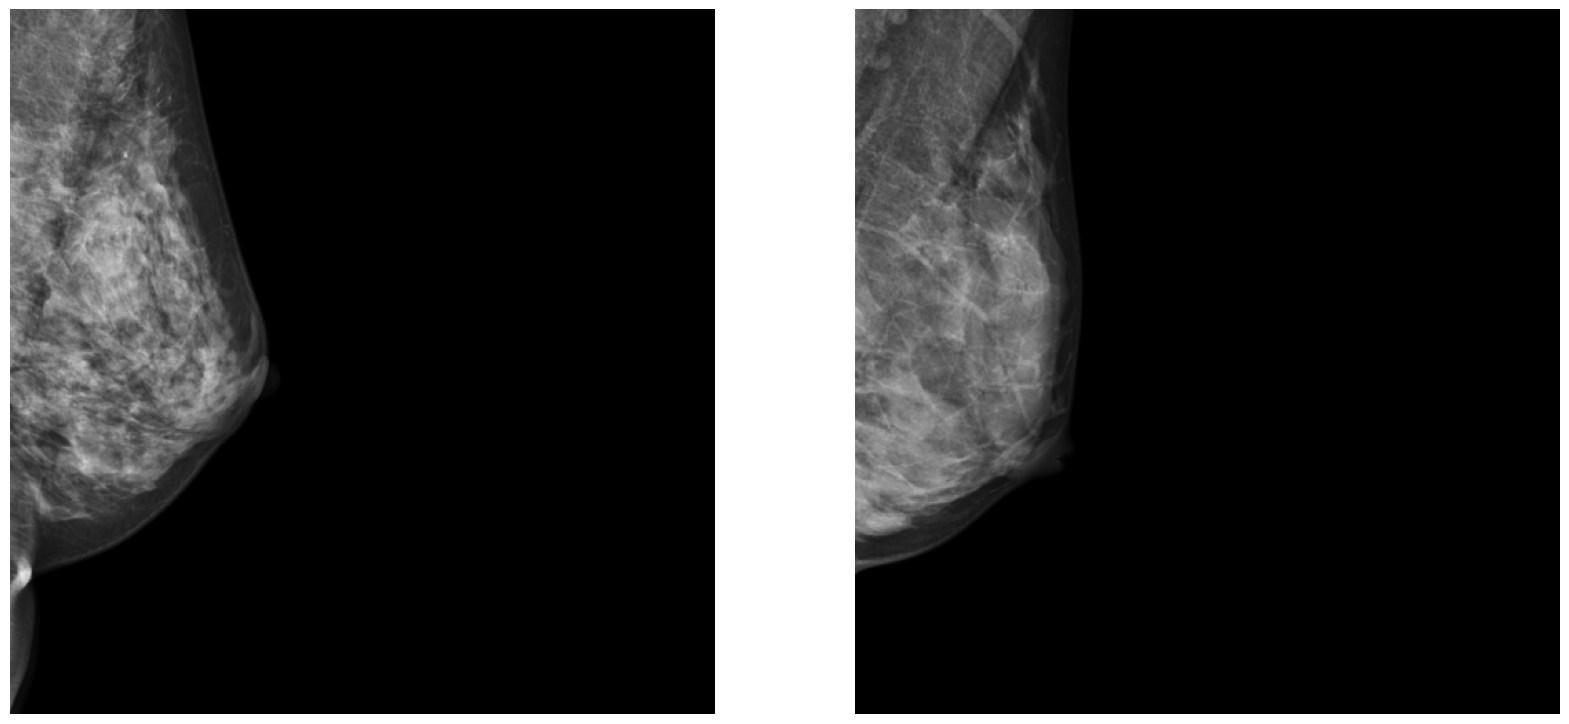

In [36]:
# HP
number_samples = 2

for view in ['CC', 'MLO']:
    for density in ['very low', 'low', 'high', 'very high']:
        # read metadata file as json file
        metadata_path = repo_path / 'data/vindr-mammo/images/siemens15k_RGB_healthy'
        metadata_file = metadata_path / 'metadata.jsonl'
        metadata = pd.read_json(metadata_file, lines=True)
        # filter metadata if both view and size are in the prompt column
        metadata = metadata[metadata['prompt'].str.contains(view) & metadata['prompt'].str.contains(density)]
        # get random samples
        samples = metadata.sample(number_samples)
        # get the image paths
        image_paths = samples['file_name'].tolist()
        # show images
        fig, axs = plt.subplots(1, number_samples, figsize=(20, 20))
        for i, image_path in enumerate(image_paths):
            image = Image.open(metadata_path / image_path)
            axs[i].imshow(image)
            axs[i].axis('off')
        # make a copy of the images using shutil
        for i, image_path in enumerate(image_paths):
            saving_path = repo_path / 'assessment/qualitative/data/siemens_real' / f'S_{view}_{density}_{i}.png'
            shutil.copy(metadata_path / image_path, saving_path)
            
